Importing numpy for scientific computing and matplotlib for plotting and using alias.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

Generating a designated/revisitable random seed

In [3]:
np.random.seed(0)

Generating data for dogs, wl means whisker length and ear flappiness index is efi

In [4]:
dwl = np.random.normal(loc=5,scale=1,size=200)
defi = np.random.normal(loc=8,scale=1,size=200)

Generating data for cats, wl means whisker length and ear flappiness index is efi

In [5]:
cwl = np.random.normal(loc=8,scale=1,size=200)
cefi = np.random.normal(loc=5,scale=1,size=200)

Converting input to matrix

In [6]:
dd = np.vstack((dwl,defi)).T
cd = np.vstack((cwl,cefi)).T
data = np.vstack((dd,cd))
labels = np.hstack((np.zeros(len(dd)), np.ones(len(cd))))

In [7]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [8]:
dd = np.vstack((dwl,defi)).T
cd = np.vstack((cwl,cefi)).T
data = np.vstack((dd,cd))
labels = np.hstack((np.zeros(len(dd)), np.ones(len(cd))))
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=42) #x is for features, y is for labels



Plotting data as scatter plot

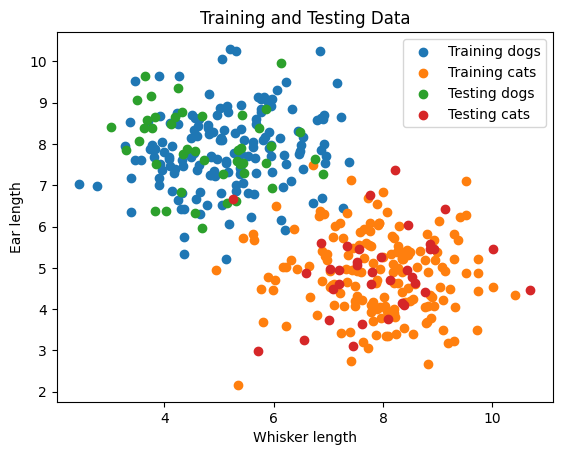

In [9]:
plt.scatter(xtrain[ytrain==0][:,0], xtrain[ytrain==0][:,1], label='Training dogs')# Dogs are labelled 0, 1st feature is 0th element, 2nd feature is 1st element
plt.scatter(xtrain[ytrain==1][:,0], xtrain[ytrain==1][:,1], label = 'Training cats')# Cats are labelled 1, 1st feature is 0th element, 2nd feature is 1st element
plt.scatter(xtest[ytest==0][:,0], xtest[ytest==0][:,1], label='Testing dogs')
plt.scatter(xtest[ytest==1][:,0], xtest[ytest==1][:,1], label='Testing cats')
plt.title('Training and Testing Data')
plt.xlabel('Whisker length')
plt.ylabel('Ear length')
plt.legend()
plt.show()
# The code above generates a dataset of two classes (dogs and cats) with two features (whisker length and ear length).

Defining random classifier function and for testing error

In [10]:
def rlc(dd, cd, k, d):
    best_error = float('inf')
    best_th = None
    best_th0 = None

    for _ in range(k):
        th = np.random.normal(size=d)
        th0 = np.random.normal()

        error = def_error(dd, cd, th, th0)

        if error < best_error:
            best_error = error
            best_th = th
            best_th0 = th0

    return best_th, best_th0, best_error

def def_error(dd, cd, th, th0):
    error = 0
    for x in dd:
        if np.dot(th,x) + th0 < 0:
            error+=1

    for x in cd:
        if np.dot(th,x) + th0 > 0:
            error+=1
    
    return error


In [22]:
best_theta_train, best_theta0_train, best_error_train = rlc(xtrain[ytrain==0], xtrain[ytrain==1], 100, 2)

In [23]:
best_theta_train

array([-0.46847604,  0.51283646])

In [24]:
best_theta0_train

-0.3263184621583181

In [25]:
best_error_train

10

Plotting the resulting linear classifier

In [26]:
x_vals_train=np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0]/best_theta_train[1])*x_vals_train - (-best_theta0_train/best_theta_train[1])

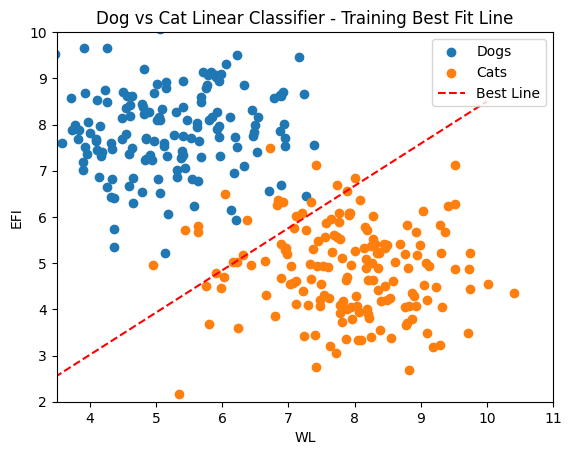

In [27]:
plt.scatter(xtrain[ytrain==0][:,0], xtrain[ytrain==0][:,1], label = 'Dogs')
plt.scatter(xtrain[ytrain==1][:,0], xtrain[ytrain==1][:,1], label = 'Cats')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label = "Best Line")
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel('WL')
plt.ylabel('EFI')
plt.title('Dog vs Cat Linear Classifier - Training Best Fit Line')
plt.legend()
plt.show()

In [30]:
#Computing Test Error
test_error = def_error(xtest[ytest==0], xtest[ytest==1], best_theta_train, best_theta0_train)
test_error

1

Plotting test data

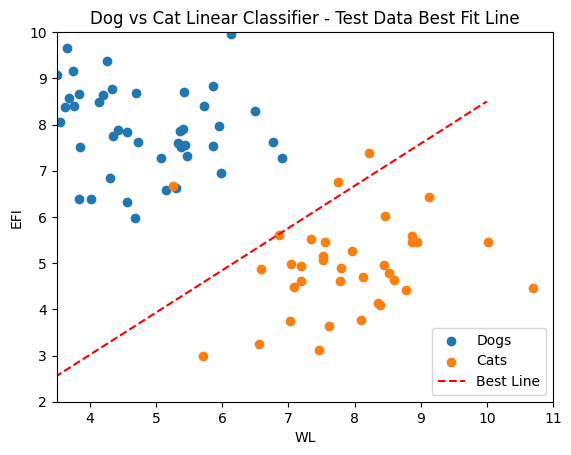

In [29]:
plt.scatter(xtest[ytest==0][:,0], xtest[ytest==0][:,1], label = 'Dogs')
plt.scatter(xtest[ytest==1][:,0], xtest[ytest==1][:,1], label = 'Cats')

x_vals_test=np.linspace(2, 10, 100)
y_vals_test = (-best_theta_train[0]/best_theta_train[1])*x_vals_test - (-best_theta0_train/best_theta_train[1])

plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label = "Best Line")
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel('WL')
plt.ylabel('EFI')
plt.title('Dog vs Cat Linear Classifier - Test Data Best Fit Line')
plt.legend()
plt.show()

Implementing K Fold Validation

In [268]:
k_values = []
for k in range(20, 301, 20):
    k_values.append(k)

In [269]:
k_values

[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]

In [270]:
def cross_validate(dd, cd, k_values, d, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(dd):
            xtrain_fold = np.vstack((dd[train_index], cd[train_index]))
            ytrain_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            xval_fold = np.vstack((dd[val_index], cd[val_index]))
            yval_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            bestth_fold, bestth0_fold, error = rlc(xtrain_fold[ytrain_fold==0], xtrain_fold[ytrain_fold==1], k, d)

            errors.append(def_error(xval_fold[yval_fold==0], xval_fold[yval_fold==1], bestth_fold, bestth0_fold))
        
        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

        

In [271]:
dd_train = xtrain[ytrain==0]
cd_train = xtrain[ytrain==1]

k_ideal = cross_validate(dd_train, cd_train, k_values, d=2, n_splits=5)
print(f"the best value of k is {k_ideal}")

the best value of k is 160


Relearning using ideal k

In [272]:
best_theta_k_train, best_theta0_k_train, best_error_k_train = rlc(xtrain[ytrain==0], xtrain[ytrain==1], k_ideal, 2)

Plotting training classifier again after kfold validation

In [273]:
x_vals_k_train=np.linspace(2, 10, 100)
y_vals_k_train = (-best_theta_k_train[0]/best_theta_k_train[1])*x_vals_k_train - (-best_theta0_k_train/best_theta_k_train[1])

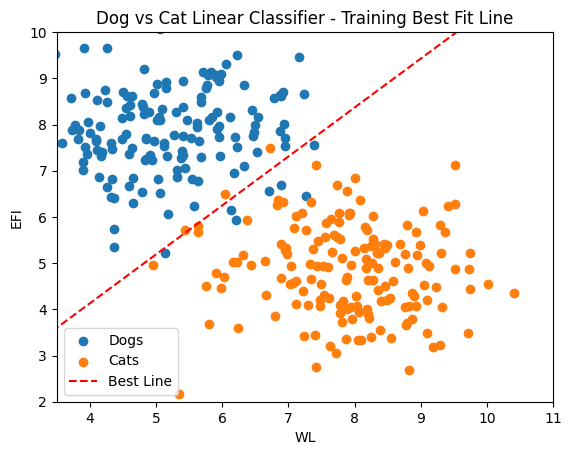

In [274]:
plt.scatter(xtrain[ytrain==0][:,0], xtrain[ytrain==0][:,1], label = 'Dogs')
plt.scatter(xtrain[ytrain==1][:,0], xtrain[ytrain==1][:,1], label = 'Cats')
plt.plot(x_vals_k_train, y_vals_k_train, color='red', linestyle='--', label = "Best Line")
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel('WL')
plt.ylabel('EFI')
plt.title('Dog vs Cat Linear Classifier - Training Best Fit Line')
plt.legend()
plt.show()

On test data after ideal k

In [275]:
test_k_error = def_error(xtest[ytest==0], xtest[ytest==1], best_theta_k_train, best_theta0_k_train)
test_k_error

2

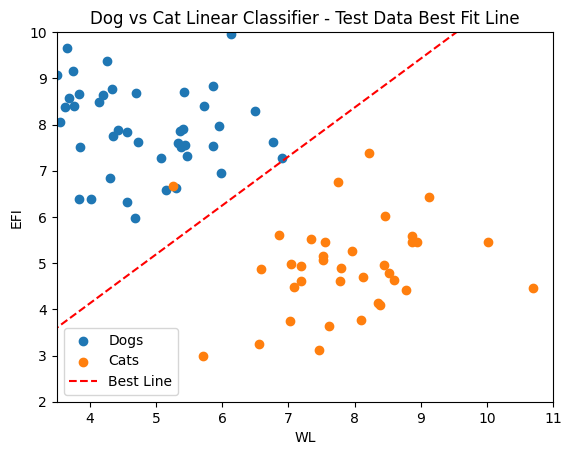

In [276]:
plt.scatter(xtest[ytest==0][:,0], xtest[ytest==0][:,1], label = 'Dogs')
plt.scatter(xtest[ytest==1][:,0], xtest[ytest==1][:,1], label = 'Cats')

x_vals_k_test=np.linspace(2, 10, 100)
y_vals_k_test = (-best_theta_k_train[0]/best_theta_k_train[1])*x_vals_k_test - (-best_theta0_k_train/best_theta_k_train[1])

plt.plot(x_vals_k_test, y_vals_k_test, color='red', linestyle='--', label = "Best Line")
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel('WL')
plt.ylabel('EFI')
plt.title('Dog vs Cat Linear Classifier - Test Data Best Fit Line')
plt.legend()
plt.show()